In [3]:
from environ import set_visible_devices
set_visible_devices('CPU')
import tensorflow as tf
from models.asr import deep_speech2

dataset_choice = 'UserLibri' # or "LJSpeech"

if dataset_choice == 'LJSpeech':
    from data.ljspeech import clients_data
    data = clients_data.load_clients_data(1, train_size=1)
    train_x, train_y = data['train'][0]
else:
    from data.userlibri import clients_data
    # Load all 55 clients and combine the data in one dataset
    data = clients_data.load_clients_data(1)
    train_x, train_y = [], []
    test_x, test_y = [], []
    for x, y in data['train']:
        train_x.extend(x)
        train_y.extend(y)
        
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train_dataset = clients_data.post_process_dataset(train_dataset, {'batch_size': 8})

THE OTHER BROTHER WAS ACCORDINGLY SENT ON A PRETENDED MISSION TO SHRIGLEY TO BRING MR TURNER ON TO LONDON WHITHER WAKEFIELD AND MISS TURNER ALSO PROCEEDED 
 tf.Tensor(
[21  9  6 31 16 21  9  6 19 31  3 19 16 21  9  6 19 31 24  2 20 31  2  4
  4 16 19  5 10 15  8 13 26 31 20  6 15 21 31 16 15 31  2 31 17 19  6 21
  6 15  5  6  5 31 14 10 20 20 10 16 15 31 21 16 31 20  9 19 10  8 13  6
 26 31 21 16 31  3 19 10 15  8 31 14 19  1 31 21 22 19 15  6 19 31 16 15
 31 21 16 31 13 16 15  5 16 15  1 31 24  9 10 21  9  6 19 31 24  2 12  6
  7 10  6 13  5 31  2 15  5 31 14 10 20 20 31 21 22 19 15  6 19 31  2 13
 20 16 31 17 19 16  4  6  6  5  6  5  1], shape=(157,), dtype=int64)


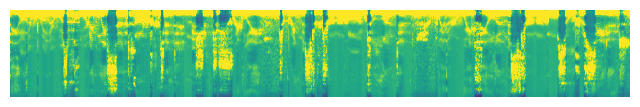

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8, 5))
for batch in train_dataset.take(1):
    spectrogram = batch[0][0].numpy()
    spectrogram = np.array([np.trim_zeros(x) for x in np.transpose(spectrogram)])
    label = batch[1][0]
    # Spectrogram
    label_text = tf.strings.reduce_join(deep_speech2.NUM_TO_CHAR(label)).numpy().decode("utf-8")
    ax = plt.subplot(2, 1, 1)
    ax.imshow(spectrogram, vmax=1)
    # ax.set_title(label)
    print(label_text, '\n', label)
    ax.axis("off")
    # Wav
    """
    file = tf.io.read_file(wavs_path + list(df_train["file_name"])[0] + ".wav")
    audio, _ = tf.audio.decode_wav(file)
    audio = audio.numpy()
    ax = plt.subplot(2, 1, 2)
    plt.plot(audio)
    ax.set_title("Signal Wave")
    ax.set_xlim(0, len(audio))
    display.display(display.Audio(np.transpose(audio), rate=16000))
    """
plt.show()

In [6]:
train_x

['/home/fipulab/.keras/datasets/LJSpeech-1.1/wavs/LJ011-0189.wav']

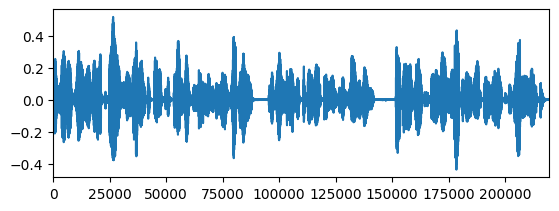

In [8]:
import tensorflow_io as tfio
from IPython import display
# file_path = "/home/fipulab/notebooks/robert/p2p_asr/data/userlibri/UserLibri/audio_data/test-clean/speaker-5683-book-9983/5683-32865-0005.flac"
file_path = '/home/fipulab/.keras/datasets/LJSpeech-1.1/wavs/LJ011-0189.wav'
file = tf.io.read_file(file_path)
if file_path.endswith('flac'):
    audio = tfio.audio.decode_flac(file, dtype=tf.int16)
else:
    audio, _ = tf.audio.decode_wav(file)
audio = audio.numpy()
ax = plt.subplot(2, 1, 2)
plt.plot(audio)
# ax.set_title("Signal Wave")
ax.set_xlim(0, len(audio))
display.display(display.Audio(np.transpose(audio), rate=16000))